# Quiz 2
This notebook is created by Chinchuthakun Worameth as a part of Complex Network (ART.T462) at Tokyo Institute of Technology taught in Fall semester 2021 by Prof. Murata Tsuyoshi. It contains
1. A program of counting the number of triangles in **karate club network**
1. A program of computing the maximum number of triangles in a graph of 9 nodes
1. A program of drawing a graph of 9 nodes and 12 edges that contains no triangles


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Question #1

First, we import the data and visualize them.

n = 34
m = 78


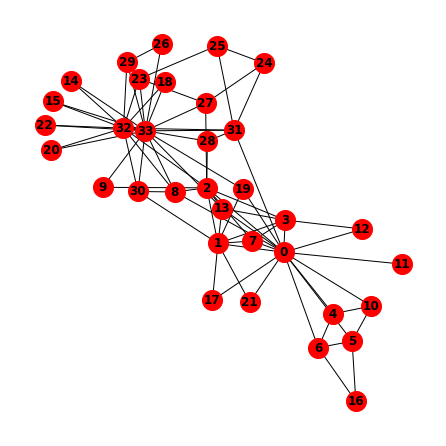

In [2]:
G = nx.karate_club_graph()
plt.figure(figsize=(6, 6))
nx.draw_spring(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')
print("n =", nx.number_of_nodes(G))
print("m =", nx.number_of_edges(G))

Let $A$ be the adjacency matrix associating with an undirected graph $G$. The number of triangle, i.e. cycle of length $3$, in the graph is given by $\text{tr}(A^3) / 6$. Please refer to the supplementary document for a derivation.

In [3]:
A = nx.adjacency_matrix(G).todense()
triangle = np.trace(A**3) / 6
print(A)
print(f"#triangle = {int(triangle)}")

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
#triangle = 45


## Question #2

As stated in the document, the maximum number of triangles in an undirected graph with $n$ nodes is $n \choose 3$.

In [4]:
from scipy.special import comb
n = 9
max_triangle = comb(n, 3, exact=True)
print(f"maximum #triangle = {max_triangle}")

maximum #triangle = 84


## Question #3

We can generate an undirected graph $G$ with $n$ nodes and $m$ edges without any triangles as follows:
1. Divide nodes into 2 groups, $S_1 = \{1,\ldots,\text{floor}(n/2)\}$ and $S_2 = \{\text{ceil}(n/2),\ldots,n\}$.
2. Add an edge between a pair of nodes $(u,v)$ where $u \in S_1$ and $v \in S_2$ until we cannot do it anymore.

In this assignment, I will restrict the output to be a connected graph.

First, we divide nodes into 2 groups and create adjacency matrix.

In [5]:
import itertools as its
n = 9; m = 12
A = np.asmatrix(np.zeros((n,n)))
S1 = [i for i in range(n//2)]
S2 = [i for i in range(n//2,n)]

# ensure that the graph is connected
for i,j in zip(its.cycle(S1),S2):
  A[i,j] = A[j,i] = 1
  m-=1

for i,j in its.product(S1,S2):
  if (not A[i,j]) and (m > 0):
      A[i,j] = A[j,i] = 1
      m-=1

print(A**3)

[[ 0.  0.  0.  0. 10. 10. 11. 11. 10.]
 [ 0.  0.  0.  0. 10. 10. 11. 11. 10.]
 [ 0.  0.  0.  0.  2.  2.  3.  2.  2.]
 [ 0.  0.  0.  0.  2.  2.  2.  3.  2.]
 [10. 10.  2.  2.  0.  0.  0.  0.  0.]
 [10. 10.  2.  2.  0.  0.  0.  0.  0.]
 [11. 11.  3.  2.  0.  0.  0.  0.  0.]
 [11. 11.  2.  3.  0.  0.  0.  0.  0.]
 [10. 10.  2.  2.  0.  0.  0.  0.  0.]]


Then, we visualize the adjacency matrix as a bipartite graph.

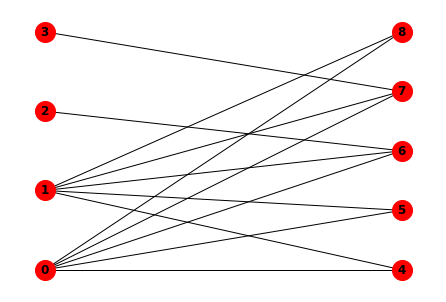

In [6]:
G = nx.Graph()
rows, cols = np.where(A == 1)
edges = zip(rows.tolist(), cols.tolist())
G.add_edges_from(edges)

pos = nx.bipartite_layout(G, S1)
nx.draw(G, node_size=400, pos=pos, node_color='red', with_labels=True, font_weight='bold')
plt.show()